In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

/tmp/ipython-input-46-1618201619.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, interval = '1d', start= '2000-02-26')
[*********************100%***********************]  1 of 1 completed


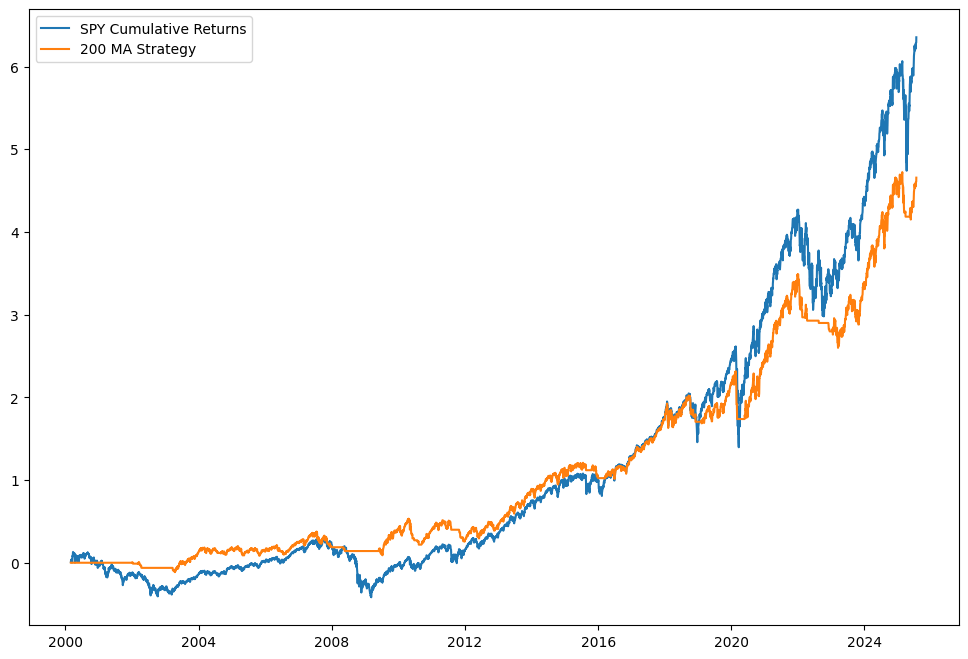

Strategy vs Buy & Hold
Asset Cumulative Return: 6.3535611243679755
Strategy Cumulative Return: 4.656271290658974
Asset Max Drawdown: -0.5518942903978536
Strategy Max Drawdown: -0.20676732533666808
Asset Sharpe: 0.502168044935498
Strategy Sharpe: 0.6816127557829332


In [46]:
TICKER = 'SPY'
WINDOW = 200


def get_data():
  df = yf.download(TICKER, interval = '1d', start= '2000-02-26')
  df['ma'] = df['Close'].rolling(window=WINDOW).mean()
  return df

def add_strategy(df):
  df.columns = df.columns.get_level_values(0)
  df.index = pd.to_datetime(df.index)
  df['strategy'] = np.where(df['Close'] > df['ma'] , 1, 0)
  df['strategy'] = df['strategy'].shift(1)
  return df

def test_strategy(df):
  df['asset_returns'] = df['Close'].pct_change()
  df['strategy_returns'] = df['asset_returns'] * df['strategy']

  df['asset_cumulative'] = ((1 + df['asset_returns']).cumprod() - 1)
  df['strategy_cumulative'] = ((1 + df['strategy_returns']).cumprod() - 1)

  #plot
  plt.figure(figsize=(12, 8))
  plt.plot(df['asset_cumulative'])
  plt.plot(df['strategy_cumulative'])
  plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} MA Strategy'])
  plt.show()

  return df

def get_metrics(df):
  asset_cum_return = df['asset_cumulative'].iloc[-1]
  strategy_cum_return = df['strategy_cumulative'].iloc[-1]

  asset_sharpe = (df['asset_returns'].mean() / df['asset_returns'].std()) * np.sqrt(252)
  strategy_sharpe = (df['strategy_returns'].mean() / df['strategy_returns'].std()) * np.sqrt(252)

  asset_growth = (1 + df['asset_returns']).cumprod()
  strategy_growth = (1 + df['strategy_returns']).cumprod()

  asset_mdrawdown = (asset_growth / asset_growth.cummax() - 1).min()
  strategy_mdrawdown = (strategy_growth / strategy_growth.cummax() - 1).min()

  print('Strategy vs Buy & Hold')
  print(f'Asset Cumulative Return: {asset_cum_return}')
  print(f'Strategy Cumulative Return: {strategy_cum_return}')

  print(f'Asset Max Drawdown: {asset_mdrawdown}')
  print(f'Strategy Max Drawdown: {strategy_mdrawdown}')

  print(f'Asset Sharpe: {asset_sharpe}')
  print(f'Strategy Sharpe: {strategy_sharpe}')


def main():
  df = get_data()
  df = add_strategy(df)
  df = test_strategy(df)
  get_metrics(df)

  return df

df = main()

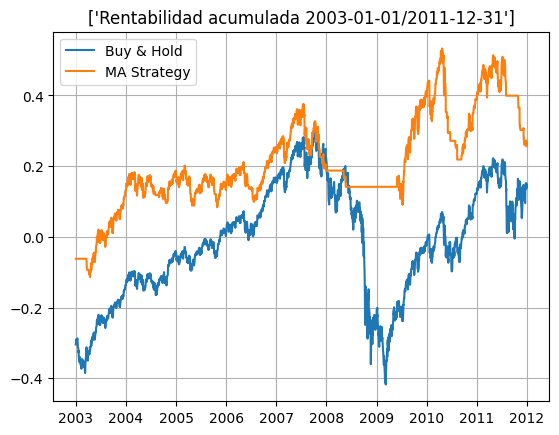

In [38]:
start = '2003-01-01'
end = '2011-12-31'

zoom_df = df.loc[start:end]

plt.plot(zoom_df['asset_cumulative'])
plt.plot(zoom_df['strategy_cumulative'])
plt.legend(['Buy & Hold', 'MA Strategy'])
plt.title([f"Rentabilidad acumulada {start}/{end}"])
plt.grid(True)
plt.show()